# integration of macaque dataset  with scDML

## load dataset 

In [1]:
import scDML
print(scDML.__version__)
import scanpy as sc 
import torch
from scDML import scDMLModel
from scDML.utils import print_dataset_information
import matplotlib.pyplot as plt
import os
os.system("clear")

###############
dataset="macaque"
ncluster=12
###############

data_dir="./tutorial_data"+"/"+dataset+"_raw.h5ad"
adata_raw=sc.read(data_dir)
print(adata_raw)
adata_raw.raw=adata_raw

print_dataset_information(adata_raw,batch_key="BATCH",celltype_key="celltype")

0.0.1
AnnData object with n_obs × n_vars = 30302 × 36162
    obs: 'batch', 'sample', 'macaque_id', 'nGene', 'nTranscripts', 'cluster', 'region', 'class', 'celltype', 'BATCH'
===========print brief infomation of dataset ===============
===========there are 4 batchs in this dataset==============
===========there are 12 celltypes with this dataset=========


celltype,BB/GB*,DB1,DB2,DB3a,DB3b,DB4,DB5*,DB6,FMB,IMB,OFFx,RB,Total
BATCH,,,,,,,,,,,,,
M1,564,578,726,225,778,862,911,312,2554,2208,69,1008,10795
M2,638,213,789,234,1370,1100,1425,143,890,1844,2,1573,10221
M3,286,144,438,146,390,378,439,92,1013,1014,8,233,4581
M4,327,61,291,18,102,645,692,111,43,1085,68,1262,4705
Total,1815,996,2244,623,2640,2985,3467,658,4500,6151,147,4076,30302


# raw dataset visulization

[<AxesSubplot:title={'center':'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

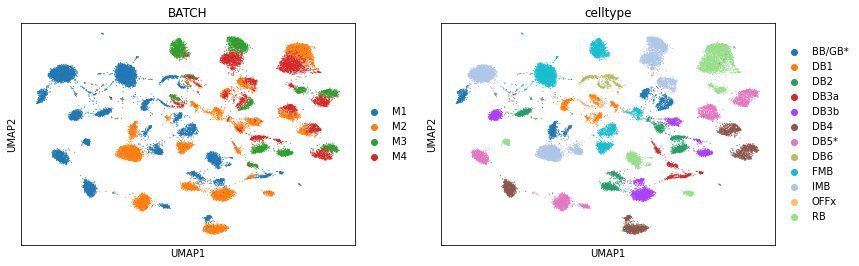

In [2]:
#View raw data,check the batch effect of this batch effect 
adata_copy=adata_raw.copy()
sc.pp.normalize_total(adata_copy,target_sum=1e4)
sc.pp.log1p(adata_copy)
sc.pp.highly_variable_genes(adata_copy,n_top_genes=2000,subset=True)
sc.pp.scale(adata_copy)
sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["BATCH","celltype"],show=False)

# scDML integration

2022-11-12 21:20:54,175 - root - INFO - Create log file....
2022-11-12 21:20:54,178 - root - INFO - Create scDMLModel Object Done....
2022-11-12 21:20:54,189 - root - INFO - Running preprocess() function...
2022-11-12 21:20:54,196 - root - INFO - clustering method=louvain
2022-11-12 21:20:54,198 - root - INFO - resolution=3.0
2022-11-12 21:20:54,199 - root - INFO - BATCH_key=BATCH
2022-11-12 21:20:54,201 - root - INFO - Normalize counts per cell(sum=10000.0)
2022-11-12 21:20:54,630 - root - INFO - Log1p data
2022-11-12 21:20:55,641 - root - INFO - Select HVG(n_top_genes=1000)
2022-11-12 21:20:58,222 - root - INFO - Scale batch(scale_value=10.0)
2022-11-12 21:21:02,612 - root - INFO - Calculate PCA(n_comps=100)
         Falling back to preprocessing with `sc.pp.pca` and default params.
2022-11-12 21:22:06,875 - root - INFO - Apply louvain clustring(resolution=3.0) initization
2022-11-12 21:22:06,886 - root - INFO - Number of Cluster =33
2022-11-12 21:22:06,893 - root - INFO - clusters=[

2022-11-12 21:25:53,124 - root - INFO - epoch=30,number_hard_triplet=946
2022-11-12 21:25:58,904 - root - INFO - epoch=31,number_hard_triplet=708
2022-11-12 21:26:03,986 - root - INFO - epoch=32,number_hard_triplet=856
2022-11-12 21:26:10,392 - root - INFO - epoch=33,number_hard_triplet=657
2022-11-12 21:26:15,656 - root - INFO - epoch=34,number_hard_triplet=590
2022-11-12 21:26:21,655 - root - INFO - epoch=35,number_hard_triplet=623
2022-11-12 21:26:27,077 - root - INFO - epoch=36,number_hard_triplet=651
2022-11-12 21:26:32,694 - root - INFO - epoch=37,number_hard_triplet=526
2022-11-12 21:26:36,763 - root - INFO - epoch=38,number_hard_triplet=639
2022-11-12 21:26:41,379 - root - INFO - epoch=39,number_hard_triplet=618
2022-11-12 21:26:45,724 - root - INFO - epoch=40,number_hard_triplet=754
2022-11-12 21:26:51,223 - root - INFO - epoch=41,number_hard_triplet=569
2022-11-12 21:26:56,259 - root - INFO - epoch=42,number_hard_triplet=548
2022-11-12 21:27:01,055 - root - INFO - epoch=43,nu

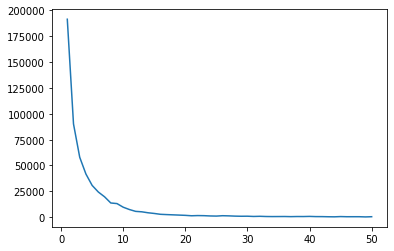

In [3]:
## fullrun
save_dir="./test_result/"+dataset+"/"

scdml=scDMLModel(save_dir=save_dir)
adata=scdml.preprocess(adata_raw,cluster_method="louvain",resolution=3.0)
#print(adata)
scdml.integrate(adata,batch_key="BATCH",ncluster_list=[ncluster],
               expect_num_cluster=ncluster,merge_rule="rule2")

plt.plot(range(1,len(scdml.loss)+1),scdml.loss)

# visulization of integrated embedding

... storing 'sample' as categorical
... storing 'macaque_id' as categorical
... storing 'region' as categorical


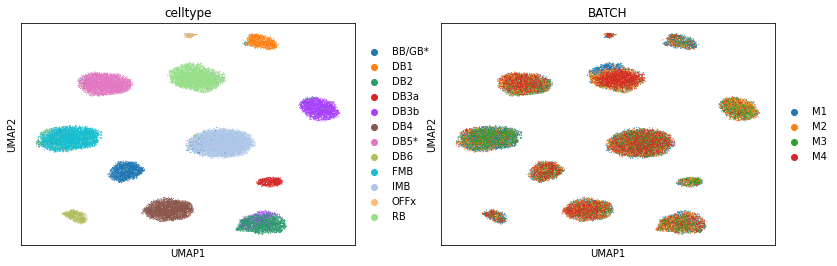

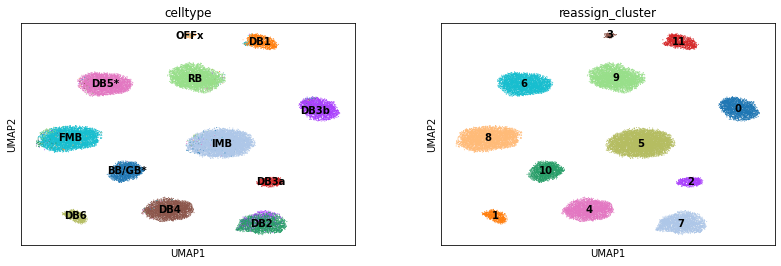

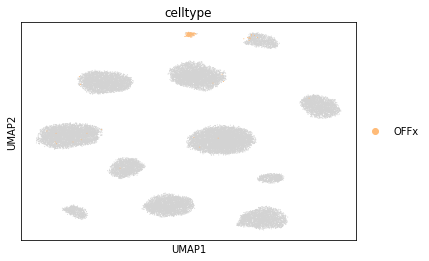

In [4]:
###########################################
sc.pp.neighbors(adata,random_state=0,use_rep="X_emb")
sc.tl.umap(adata)
###########################################

sc.pl.umap(adata,color=["celltype","BATCH"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")
sc.pl.umap(adata,color=["celltype","reassign_cluster"],legend_loc="on data",show=False)
#plt.savefig(save_dir+"scDML_embedding2.png")

sc.pl.umap(adata,color=["celltype"],groups=["OFFx"],na_in_legend=False)

# evaluation

In [5]:
import pandas as pd
df=pd.crosstab(adata.obs["celltype"],adata.obs["reassign_cluster"])
col=df.apply('idxmax', axis=1).values
df=df[col]
df

reassign_cluster,10,11,7,2,0,4,6,1,8,5,3,9
celltype,,,,,,,,,,,,
BB/GB*,1720,1,0,1,0,2,2,1,7,77,0,4
DB1,1,971,0,1,1,0,0,1,10,1,8,2
DB2,3,0,2120,0,48,4,4,1,59,3,0,2
DB3a,1,0,0,616,0,0,0,0,3,0,1,2
DB3b,0,1,484,1,2121,5,5,0,13,4,1,5
DB4,0,0,2,0,1,2965,12,0,1,0,1,3
DB5*,1,0,2,0,1,3,3434,0,3,13,0,10
DB6,1,0,0,0,0,1,2,641,2,5,0,6
FMB,1,32,7,3,9,5,4,0,4396,13,24,6


In [6]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
nmi=normalized_mutual_info_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))

ARI=0.934094270514994
NMI=0.9218230801718509


# citation

Peng, Y.-R. et al. Molecular Classification and Comparative Taxonomics of Foveal and Peripheral Cells in Primate Retina. Cell 176, 1222-1237.e22 (2019).

In [8]:
# Attention!!!!
# you can also use leiden clustering algorithm to for cluster inizitization, 
# It may give more accurate result than louvain